In [3]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
data_dir = Path.cwd().parent / 'DATA'
data = {
    "train": data_dir / "train_data.csv",
    "test": data_dir / "test_data.csv",
    "sample": data_dir / "sample_solotion.csv",
}

In [6]:
%%time
train_df = pd.read_csv(data["train"])
print(f"training dataframe -> rows: {train_df.shape[0]}, cols: {train_df.shape[1]}")
train_mem_size = train_df.memory_usage(deep=True).sum() / 1024
print(f"-- memory usage: {round(train_mem_size):,} MB")

training dataframe -> rows: 375734, cols: 246
-- memory usage: 761,726 MB
CPU times: total: 7.16 s
Wall time: 10.1 s


In [7]:
%%time
test_df = pd.read_csv(data["test"])
print(f"training dataframe -> rows: {test_df.shape[0]}, cols: {test_df.shape[1]}")
test_mem_size = test_df.memory_usage(deep=True).sum() / 1024
print(f"-- memory usage: {round(test_mem_size):,} MB")

training dataframe -> rows: 31354, cols: 245
-- memory usage: 63,342 MB
CPU times: total: 656 ms
Wall time: 924 ms


In [8]:
TARGET = "contest-tmp2m-14d__tmp2m"

In [9]:
FIG_SIZE = (15, 9)

In [10]:
train_df["date"] = pd.to_datetime(train_df["startdate"])

In [11]:
SMPL_LAT = 0.5
SMPL_LON = 0.5

In [12]:
loc_df = train_df \
    .loc[(train_df["lon"] == SMPL_LON) & (train_df["lat"] == SMPL_LAT), :] \
    .reset_index(drop=True) \
    .copy()
print(f"sample location LAT/LON -> {(SMPL_LAT, SMPL_LON)}, rows: {loc_df.shape[0]}, cols: {loc_df.shape[1]}")

sample location LAT/LON -> (0.5, 0.5), rows: 731, cols: 247


In [13]:
split_prct = 80
split = round(loc_df.shape[0] * split_prct / 100)
print(f"{split_prct}% split = {split} rows")

80% split = 585 rows


In [14]:
color_map = {"train": "b", "val": "r"}

In [15]:
loc_df["segment"] = loc_df.index.to_series().apply(lambda x: "train" if x <= split else "val")
colors = loc_df.segment.map(color_map)

In [16]:
loc_df["segment"].value_counts()

train    586
val      145
Name: segment, dtype: int64

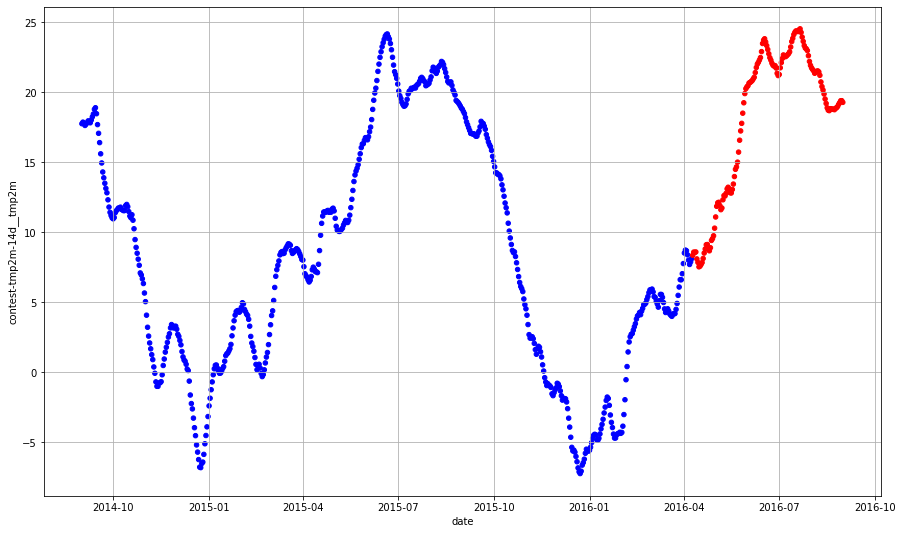

In [17]:
loc_df.plot.scatter(x="date", y=TARGET, figsize=FIG_SIZE, marker="o", color=colors)
plt.grid()
plt.show()

In [18]:
def column_corr(in_df: pd.DataFrame, constant_cols: list) -> list:
    trgt_corr = in_df.corr(numeric_only=True)[TARGET].sort_values(ascending=False)
    all_cols = trgt_corr.index.to_list()
    skip_cols = [TARGET]
    skip_cols.extend(constant_cols)
    keep_cols = [c for c in all_cols if c not in skip_cols]
    trgt_corr = trgt_corr[trgt_corr.index.isin(keep_cols)]
    trgt_corr.name = "correlation"
    corr_df = pd.DataFrame(trgt_corr)
    corr_df["abs. corr."] = corr_df["correlation"].abs()
    top_corr_df = corr_df[corr_df["abs. corr."] >= THRSHLD]
    print(f"columns w/ abs. corr. above {THRSHLD}: {top_corr_df.shape[0]}")
    display(top_corr_df)
    return top_corr_df.index.to_list()

In [19]:
sample_constants = ["lat", "lon", "elevation__elevation"]

In [20]:
THRSHLD = 0.9

In [21]:
top_cols = column_corr(in_df=loc_df, constant_cols=sample_constants)

columns w/ abs. corr. above 0.9: 31


,correlation,abs. corr.
nmme-tmp2m-56w__cfsv2,0.967992,0.967992
nmme-tmp2m-34w__cfsv2,0.967153,0.967153
nmme-tmp2m-34w__ccsm4,0.962901,0.962901
nmme-tmp2m-56w__nmmemean,0.962030,0.962030
nmme-tmp2m-56w__ccsm4,0.961941,0.961941
nmme-tmp2m-34w__nmmemean,0.961684,0.961684
nmme-tmp2m-56w__gfdlflora,0.961073,0.961073
nmme-tmp2m-56w__gfdl,0.959992,0.959992
nmme-tmp2m-56w__cancm4,0.959700,0.959700
nmme-tmp2m-34w__cancm4,0.959491,0.959491


In [22]:
keep_cols = [TARGET, "date", "segment"]
keep_cols.extend(top_cols.copy())

In [23]:
loc_slct_df = loc_df[keep_cols].copy()
print(f"narrowed sample dataframe -> rows: {loc_slct_df.shape[0]}, cols: {loc_slct_df.shape[1]}")

narrowed sample dataframe -> rows: 731, cols: 34


In [24]:
y_cols = top_cols.copy()
y_cols.append(TARGET)

In [25]:
scaler = StandardScaler()

In [26]:
scld_slct_df = pd.DataFrame(scaler.fit_transform(loc_slct_df[y_cols]))
scld_slct_df.columns = y_cols

In [27]:
for col in ["date", "segment"]:
    scld_slct_df[col] = loc_slct_df[col].copy()

In [28]:
scld_slct_df.fillna(0, inplace=True)

In [29]:
scld_slct_df.head()

,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-56w__nmmemean,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-34w__nmmemean,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__cancm4,nmme-tmp2m-34w__cancm4,...,wind-uwnd-250-2010-1,contest-prwtr-eatm-14d__prwtr,wind-hgt-850-2010-1,wind-hgt-100-2010-1,wind-hgt-500-2010-1,wind-vwnd-925-2010-1,wind-hgt-10-2010-1,contest-tmp2m-14d__tmp2m,date,segment
0,0.724069,0.786992,0.695095,0.780194,0.842721,0.772179,0.810347,0.684539,0.783381,0.770309,...,1.135232,0.845214,-0.802652,-0.874867,-0.668528,-0.932835,-0.865134,0.884346,2014-09-01,train
1,0.724069,0.786992,0.695095,0.780194,0.842721,0.772179,0.810347,0.684539,0.783381,0.770309,...,1.111893,0.905021,-0.805952,-0.865066,-0.659801,-0.918381,-0.844577,0.896854,2014-09-02,train
2,0.724069,0.786992,0.695095,0.780194,0.842721,0.772179,0.810347,0.684539,0.783381,0.770309,...,1.087912,1.002208,-0.808693,-0.855309,-0.648688,-0.891478,-0.821801,0.885339,2014-09-03,train
3,0.724069,0.786992,0.695095,0.780194,0.842721,0.772179,0.810347,0.684539,0.783381,0.770309,...,1.065591,1.121822,-0.797853,-0.840692,-0.629050,-0.838007,-0.797257,0.870166,2014-09-04,train
4,0.724069,0.786992,0.695095,0.780194,0.842721,0.772179,0.810347,0.684539,0.783381,0.770309,...,1.041682,1.169170,-0.775310,-0.819057,-0.599824,-0.780192,-0.770790,0.881051,2014-09-05,train


In [30]:
scld_slct_df["segment"].value_counts()

train    586
val      145
Name: segment, dtype: int64

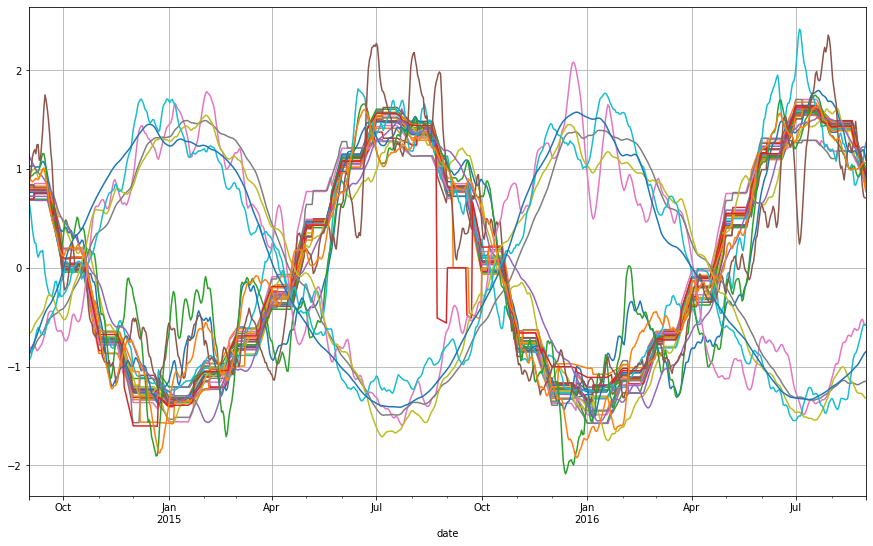

In [31]:
scld_slct_df.plot.line(x="date", y=y_cols, figsize=FIG_SIZE, legend=False)
plt.grid()
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor

In [33]:
# Forecast difference of log values
x_cols = top_cols.copy()
X, Y = scld_slct_df[x_cols], scld_slct_df[TARGET]

In [34]:
# Split in train-test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False, random_state=0)

In [35]:
# Initialize the estimator
mdl_adaboost = AdaBoostRegressor(n_estimators=500, learning_rate=0.05)

In [36]:
%%time
# Fit the data
mdl_adaboost.fit(X_train, Y_train)

CPU times: total: 1.25 s
Wall time: 1.71 s


AdaBoostRegressor(learning_rate=0.05, n_estimators=500)

In [37]:
# Make predictions
pred = mdl_adaboost.predict(X_test)

In [38]:
real = scld_slct_df.tail(test_size)[TARGET]

NameError: name 'test_size' is not defined

In [ ]:
compare = pd.DataFrame()
compare['real'] = Y_test
compare['predicted'] = pred

In [ ]:
compare.head()

In [ ]:
compare.plot.line(marker='o', figsize=FIG_SIZE)
plt.title('Predicted vs Real with log difference values')
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mean_squared_error(real, pred)

In [ ]:
r2_score(real, pred)